In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as smb
import statsmodels.api as smo
import statsmodels.formula.api as smf
from scipy import stats

df = pd.read_csv(r'logistic regression dataset-Social_Network_Ads.csv')


In [13]:
df_training = df.sample(frac=0.8,random_state=200)
#df_training = df_training.drop(['User ID', 'Gender', 'Age'], axis=1)
df_test = df.drop(df_training.index)
#df_test = df_test.drop(['User ID', 'Gender', 'Age'], axis=1)
print(df_test.shape)

(80, 5)


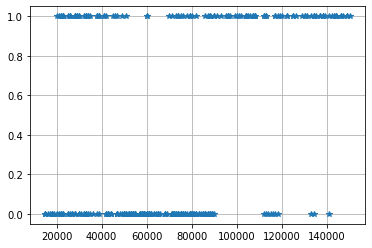

In [14]:
plt.plot(df_training["EstimatedSalary"], df_training["Purchased"], '*')
#plt.scatter(df_training["EstimatedSalary"], df_training["Purchased"])
plt.grid()
plt.show()

In [15]:
model = smf.logit(formula = 'Purchased ~ EstimatedSalary', data = df_training)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.595592
         Iterations 5


In [16]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.1039
Time:                        18:33:07   Log-Likelihood:                -190.59
converged:                       True   LL-Null:                       -212.70
Covariance Type:            nonrobust   LLR p-value:                 2.947e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2195      0.314     -7.079      0.000      -2.834      -1.605
EstimatedSalary  2.363e-05   3.84e-06      6.150      0.000    1.61e-05    3.12e-05


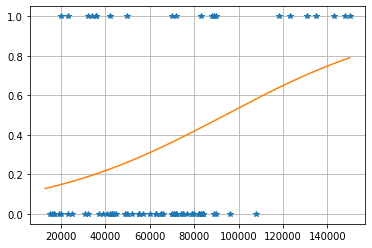

In [17]:
val = np.linspace(13000,150000,320)
valDf = pd.DataFrame(data = val, columns = ["EstimatedSalary"])

yhat = res.predict(valDf)
plt.plot(df_test['EstimatedSalary'], df_test['Purchased'], '*',valDf, yhat) 
plt.grid()
plt.show()

In [18]:
confDf = pd.DataFrame({'Probability':res.predict(df_test)})
confDf['predLabel'] = (confDf['Probability']>0.5).astype(int)

(80, 2)


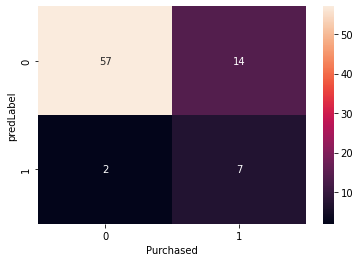

In [19]:
confMatrix = pd.crosstab(confDf['predLabel'],df_test['Purchased'])
sns.heatmap(confMatrix, annot = True)                  
plt.show()

In [20]:
TN = 57
FN = 14
FP = 2
TP = 7
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

BA = (TPR + TNR)/2
print(f"BA = {BA:0.2f}")

BA = 0.65


TASK 2

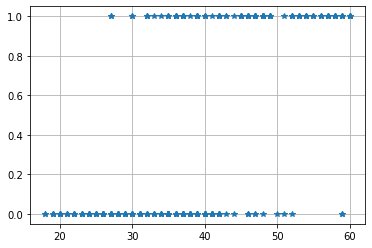

In [23]:
plt.plot(df_training['Age'], df_training['Purchased'], '*')
plt.grid()
plt.show()

In [32]:
model2 = smf.logit(formula = 'Purchased ~ EstimatedSalary + Age', data = df_training)
res2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.346824
         Iterations 8


In [33]:
print(res2.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.4782
Time:                        18:56:05   Log-Likelihood:                -110.98
converged:                       True   LL-Null:                       -212.70
Covariance Type:            nonrobust   LLR p-value:                 6.718e-45
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.8212      1.502     -8.533      0.000     -15.766      -9.876
EstimatedSalary  3.603e-05    6.1e-06      5.911      0.000    2.41e-05     4.8e-05
Age                 0.2447      

In [27]:
confDf_2 = pd.DataFrame({'Probability':res2.predict(df_test)})
confDf_2['predLabel'] = (confDf_2['Probability']>0.5).astype(int)

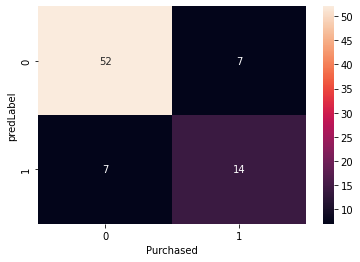

In [28]:
confMatrix2 = pd.crosstab(confDf_2['predLabel'],df_test['Purchased'])
sns.heatmap(confMatrix2, annot = True)                  
plt.show()

In [29]:
TN = 52
FN = 7
FP = 7
TP = 14
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

BA = (TPR + TNR)/2
print(f"BA = {BA:0.2f}")

BA = 0.77
